In [3]:
import pandas as pd
df=pd.read_csv('letter_recognition.csv')

In [4]:
df.head()

,letter,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
x=df.drop('letter',axis=1)
y=df['letter']

In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
sc=StandardScaler()
le=LabelEncoder()
x=sc.fit_transform(x)
y=le.fit_transform(y)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

model = Sequential([
    Input(shape=(x.shape[1],)),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(26,activation='softmax'),
])
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping (
    patience=2,
    verbose=1,
    monitor='val_accuracy',
    restore_best_weights=True
)
history=model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.3221 - loss: 2.4739 - val_accuracy: 0.7072 - val_loss: 1.0479
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - accuracy: 0.7260 - loss: 0.9484 - val_accuracy: 0.7895 - val_loss: 0.7528
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.7945 - loss: 0.7134 - val_accuracy: 0.8292 - val_loss: 0.6164
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - accuracy: 0.8279 - loss: 0.5987 - val_accuracy: 0.8508 - val_loss: 0.5319
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - accuracy: 0.8479 - loss: 0.5191 - val_accuracy: 0.8640 - val_loss: 0.4750
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - accuracy: 0.8687 - loss: 0.4453 - val_accuracy: 0.8758 - val_loss: 0.4398
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - accuracy: 0.8743 - loss: 0.4199 - val_accuracy: 0.8823 - val_loss: 0.4014
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - accuracy: 0.8880 - loss: 0

In [13]:
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step


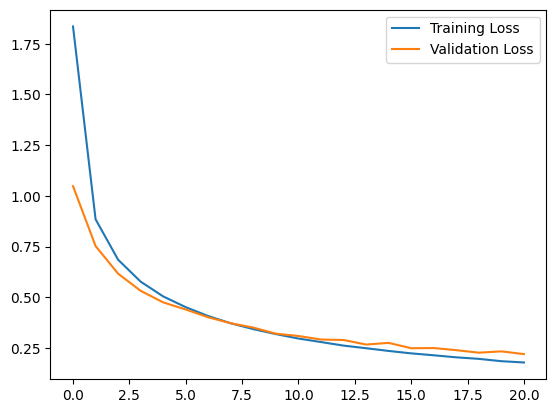

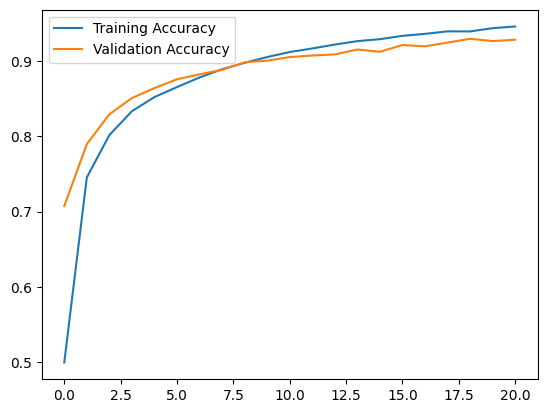

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

In [15]:
import numpy as np
names = np.sort(df['letter'].unique())
print(names)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
